## Quantum Computing - Final project

### Solving satisfiability problems using Grover’s Algorithm

Trabalho realizado por:

- Bruno Miguel Ferreira Fernandes, A95972
- Carlos André Machado Costa, A94543


###  Design a solvable 3-SAT boolean formula.

Como primeira tarefa deste trabalho prático, é nos pedida a criação de uma fórmula booleana 3-SAT. Ora, uma fórmula booleana 3-SAT corresponde, tal como um nome diz, a uma fórmula que pode ser satisfeita ou não. Ou seja, caso exista uma atribuição de valores de verdade para as variáveis desta que a tornem verdadeira, então esta é satisfeita. Caso contrário, não o é. Para além disso, uma fórmula 3-SAT tem que conter 3 variáveis em cada claúsula.

      Assim sendo, consideremos a seguinte fórmula,f: 

   f(v1,v2,v3) = ( ¬v1 ∨ ¬v2 ∨ ¬v3) ∧ (v1 ∨ ¬v2 ∨ v3) ∧ (v1 ∨ v2 ∨ ¬v3) ∧ (v1 ∨ ¬v2 ∨ ¬v3) ∧ ( ¬v1 ∨ v2 ∨ v3)

Consideremos:

    x1 = ( ¬v1 ∨ ¬v2 ∨ ¬v3)
    
    x2 = (  v1 ∨ ¬v2 ∨  v3)
    
    x3 = (  v1 ∨  v2 ∨ ¬v3)
    
    x4 = (  v1 ∨ ¬v2 ∨ ¬v3)
    
    x5 = ( ¬v1 ∨  v2 ∨  v3)
    
    x6 = ( ¬v1 ∨ ¬v2 ∨  v3)

    x7 = (  v1 ∨  v2 ∨  v3)

| v1 | v2 | v3 | x1 | x2 | x3 | x4 | x5 | x6 | x7 | f  |
|----|----|----|----|----|----|----|----|----|----|----|
| 0  | 0  | 0  | 1  | 1  | 1  | 1  | 1  | 1  | 0  | 0  |
| 0  | 0  | 1  | 1  | 1  | 0  | 1  | 1  | 1  | 1  | 0  |
| 0  | 1  | 0  | 1  | 0  | 1  | 1  | 1  | 1  | 1  | 0  |
| 0  | 1  | 1  | 1  | 1  | 1  | 0  | 1  | 1  | 1  | 0  |
| 1  | 0  | 0  | 1  | 1  | 1  | 1  | 0  | 1  | 1  | 0  |
| 1  | 0  | 1  | 1  | 1  | 1  | 1  | 1  | 1  | 1  | 1  |
| 1  | 1  | 0  | 1  | 1  | 1  | 1  | 1  | 0  | 1  | 0  |
| 1  | 1  | 1  | 0  | 1  | 1  | 1  | 1  | 1  | 1  | 0  |


Pela observação da tabela lógica obtida, podemos concluir que, estamos perante uma fórmula booleana 3-SAT com solução, tal como pretendíamos.

### Implementaçao do Algoritmo De Grover

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_distribution
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def execute_circuit(qc, shots=1024, decimal=False):
    device = Aer.get_backend('qasm_simulator')
    counts = device.run(qc, shots=shots).result().get_counts()
    
    if decimal:
        counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
    else:
        counts = dict((a[::-1],b) for (a,b) in counts.items())

    return counts

"""
#ou executamos apenas mais a frente com este código

backend = Aer.get_backend('qasm_simulator')
counts = backend.run(qc, shots=1024).result().get_counts()
plot_histogram(counts)

"""

"\n#ou executamos apenas mais a frente com este código\n\nbackend = Aer.get_backend('qasm_simulator')\ncounts = backend.run(qc, shots=1024).result().get_counts()\nplot_histogram(counts)\n\n"

O Algoritmo de Grover divide-se em três fases, inicialização, o  Óraculo e Difusor.

Para a sua correta implementação, é necessário saber o número de qubits a utilizar. Sabendo que necessitamos de um qubit para cada variável inicial, um qubit para o resultado final e, ainda, um qubit por cada claúsula existente na nossa fórmula, podemos concluir que precisamos, então, de 11 qubits.

- Inicializaremos, então, a construção do nosso circuito.

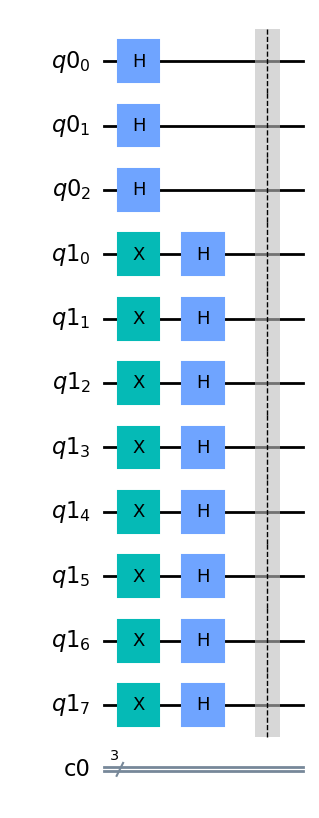

In [3]:
#Criação do Circuito
n_qubits = 11
qr = QuantumRegister(3)
ancilla = QuantumRegister(8)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr, ancilla)

# Sobreposição uniforme
qc.h(qr)

# |-> inicializar
qc.x(ancilla)
qc.h(ancilla)

qc.barrier()

qc.draw(output="mpl")


## óraculo


In [4]:
def oracle(qr, ancilla):
    qc = QuantumCircuit(qr,ancilla)
    
    # f1
    qc.mcx(qr,ancilla[0])
    qc.x(ancilla[0])
    
    #f2
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr,ancilla[1])
    qc.x(ancilla[1])
    qc.x(qr[0])
    qc.x(qr[1])
    
    #f3
    qc.x(qr[0])
    qc.x(qr[2])
    qc.mcx(qr,ancilla[2])
    qc.x(ancilla[2])
    qc.x(qr[0])
    qc.x(qr[2])
    
    #f4
    qc.x(qr[0])
    qc.mcx(qr,ancilla[3])
    qc.x(ancilla[3])
    qc.x(qr[0])
    
    
    #f5
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,ancilla[4])
    qc.x(ancilla[4])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f6
    qc.x(qr[1])
    qc.mcx(qr,ancilla[5])
    qc.x(ancilla[5])
    qc.x(qr[1])
    
    #f7
    qc.x(qr[2])
    qc.mcx(qr,ancilla[6])
    qc.x(ancilla[6])
    qc.x(qr[2])
    
    
    #F
    qc.mcx(ancilla[:-1],ancilla[-1])
    
    qc.barrier()
    return qc

## Difusor

O operador de difusão atua sobre os 3 qubits que representam os literais, procedendo da seguinte forma:

1. Aplica uma porta Hadamard aos 3 qubits para remover o estado de sobreposição.
2. Aplica um porta $X$ aos 3 qubits.
3. Aplica uma porta Multi-Control Toffoli dos dois primeiros qubits ao terceiro.
4. Aplica uma porta Hadamard aos 3 qubits.


In [5]:
def diffusion_operator(qr, ancilla):
    qc = QuantumCircuit(qr,ancilla)

    qc.h(qr)
    qc.x(qr)
    qc.h(qr[-1])

    qc.mcx(qr[:-1],qr[-1])
    
    qc.h(qr[-1])
    qc.x(qr)
    qc.h(qr)

    qc.barrier()
    
    return qc 

### Qual o número de iterações necessárias ?

In [6]:
elementos = 2**3
iteracoes= int(np.floor(np.pi/4 * np.sqrt(elementos)))
print("Numero de iterações necessárias: %d " % iteracoes)

Numero de iterações necessárias: 2 


### Composição do circuito com oráculo e difusor

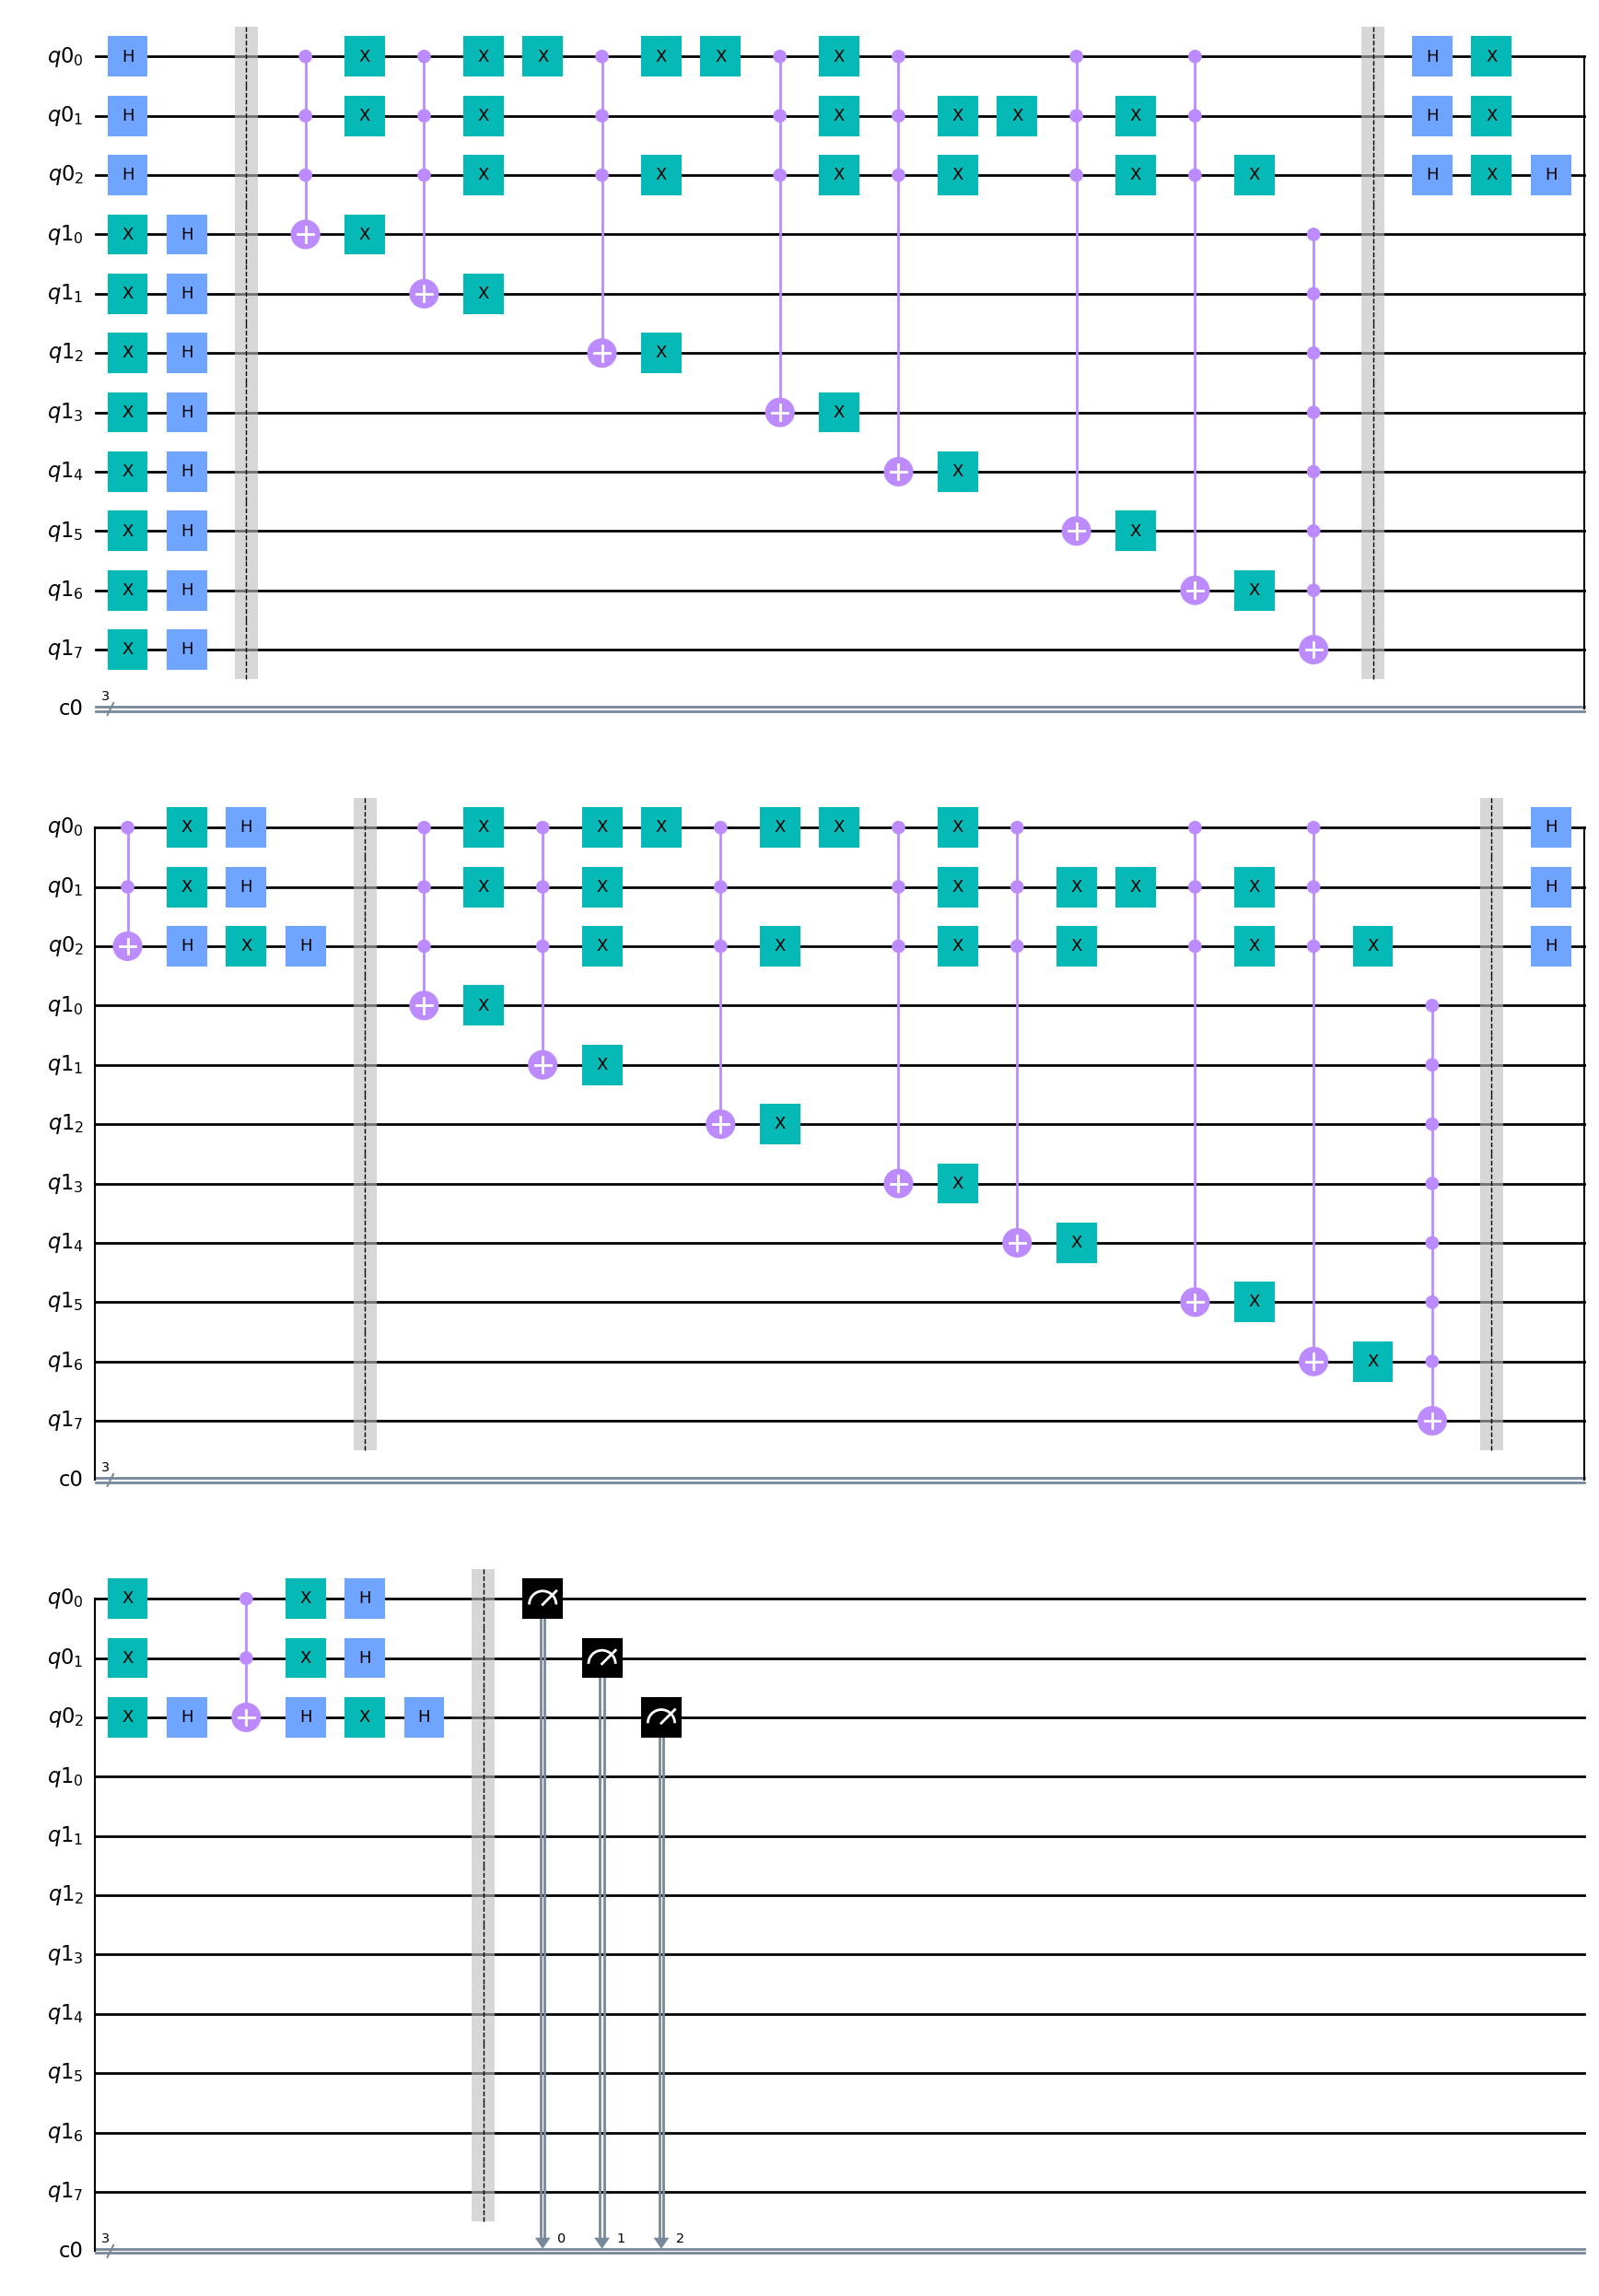

In [7]:
for i in range(2):
    qc = qc.compose(oracle(qr,ancilla))
    qc = qc.compose(diffusion_operator(qr,ancilla))

qc.measure(qr,cr)
qc.draw(output="mpl")

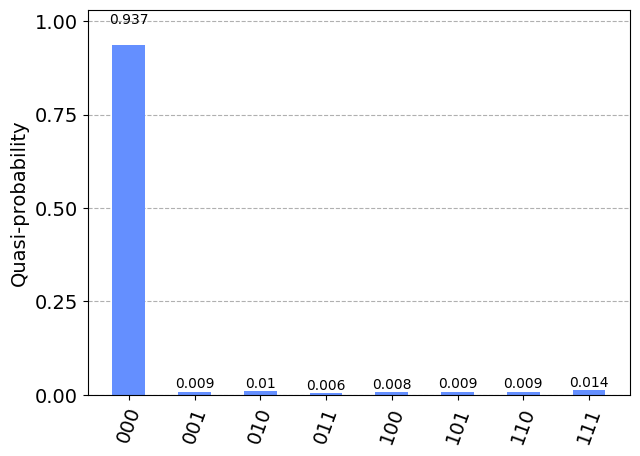

In [9]:
counts = execute_circuit(qc)
plot_distribution(counts)

### Testes para 1 e 3 iterações para comparação de resultados

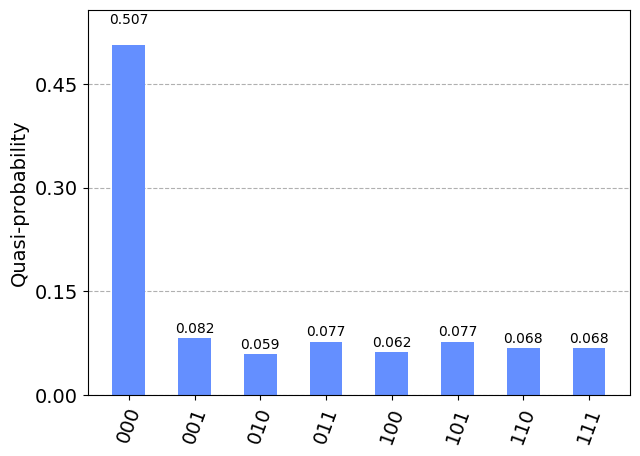

In [10]:
qc = qc.compose(oracle(qr,ancilla))
qc = qc.compose(diffusion_operator(qr,ancilla))


qc.measure(qr,cr)
qc.draw(output="mpl")

counts = execute_circuit(qc)
plot_distribution(counts)

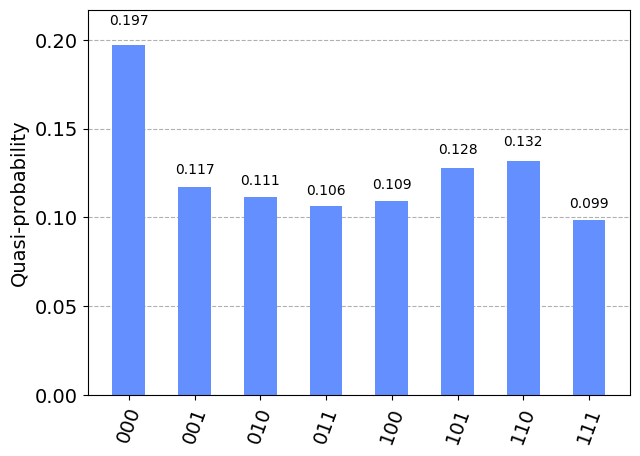

In [11]:
for j in range(3):
    qc = qc.compose(oracle(qr,ancilla))
    qc = qc.compose(diffusion_operator(qr,ancilla))


qc.measure(qr,cr)
qc.draw(output="mpl")

counts = execute_circuit(qc)
plot_distribution(counts)

## Conclusão

Em suma, consideramos que a realização deste projeto foi bastante vantajosa, uma vez que não só nos possibilitou uma melhor consolidação dos tópicos abordados nas aulas, como também permitiu-nos aplicar esses conhecimentos numa aplicação diferente da habitual. Julgamos, ainda, ter cumprido os objetivos propostos.